# Weapon Expected Damage

## Setup

In [1]:
import pandas as pd
from decimal import Decimal
from scipy.stats import binom
from scripts.probability import at_least_one

## Example: X-Com Rifle

Having:

- A rifle
- With 60% chance to hit with a burst of 1
- With 35% chance to hit with a burst of 3
- Damage of 30

We want to know:

- The expected damage

## Calculations

### Single Shot

In [2]:
values = []
n = 1
p_single = 0.6

for i in range(0, n + 1, 1):
    values.append(binom.pmf(i, n, p_single))
d = {"chance": values}
data_single = pd.DataFrame(data=d)
data_single['trials'] = data_single.index
data_single

,chance,trials
0,0.4,0
1,0.6,1


In [3]:
data_single["damage"] = data_single.apply(lambda x: 30 * x["trials"], axis=1)
data_single["expected_damage"] = data_single.apply(lambda x: x["chance"] * x["damage"], axis=1)
data_single

,chance,trials,damage,expected_damage
0,0.4,0,0.0,0.0
1,0.6,1,30.0,18.0


### Burst

In [4]:
values = []
n = 3
p_burst = 0.35

for i in range(0, n + 1, 1):
    values.append(binom.pmf(i, n, p_burst))
d = {"chance": values}
data_burst = pd.DataFrame(data=d)
data_burst['trials'] = data_burst.index
data_burst

,chance,trials
0,0.274625,0
1,0.443625,1
2,0.238875,2
3,0.042875,3


In [5]:
data_burst["damage"] = data_burst.apply(lambda x: 30 * x["trials"], axis=1)
data_burst["expected_damage"] = data_burst.apply(lambda x: x["chance"] * x["damage"], axis=1)
data_burst

,chance,trials,damage,expected_damage
0,0.274625,0,0.0,0.00000
1,0.443625,1,30.0,13.30875
2,0.238875,2,60.0,14.33250
3,0.042875,3,90.0,3.85875


## At Least One

Getting the chance of at least one hit gives us a lower bound.

### Single Shot

In [6]:
at_least_one_single = at_least_one(p_single, 1)
at_least_one_single * 30

18.0

### Burst

In [7]:
at_least_one_burst = at_least_one(p_burst, 3)
at_least_one_burst * 30

21.76125

### Final

In [8]:
(at_least_one_single + at_least_one_burst) / 2 * 30

19.880625

## Binomial Distribution

### Single Shot

Text(0, 0.5, 'Chance')

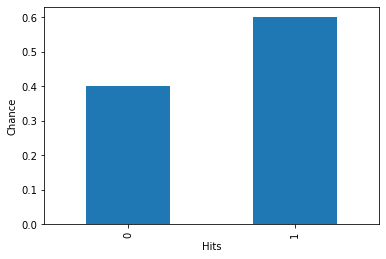

In [9]:
ax = data_single.plot.bar(x="trials", y="chance", legend=False)
ax.set_xlabel("Hits")
ax.set_ylabel("Chance")

Text(0, 0.5, 'Average damage')

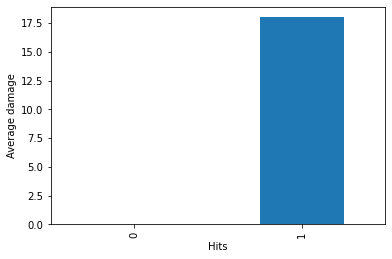

In [10]:
ax = data_single.plot.bar(x="trials", y="expected_damage", legend=False)
ax.set_xlabel("Hits")
ax.set_ylabel("Average damage")

### Burst

Text(0, 0.5, 'Chance')

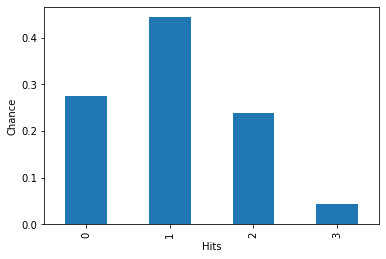

In [11]:
ax = data_burst.plot.bar(x="trials", y="chance", legend=False)
ax.set_xlabel("Hits")
ax.set_ylabel("Chance")

Text(0, 0.5, 'Average damage')

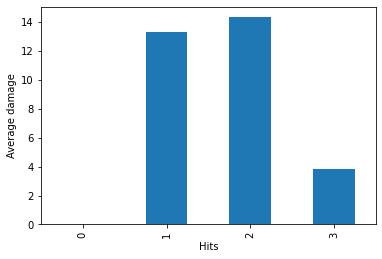

In [12]:
ax = data_burst.plot.bar(x="trials", y="expected_damage", legend=False)
ax.set_xlabel("Hits")
ax.set_ylabel("Average damage")

## Binomial Mean

The chance to hit follows a binomial distribution. So it seems logical to use the binomial mean.

### Single Shot

In [13]:
mean_single = binom.mean(1, p_single)
mean_single * 30

18.0

### Burst

In [14]:
mean_burst = binom.mean(3, p_burst)
mean_burst * 30

31.499999999999993

### Final

In [15]:
(mean_single + mean_burst) / 2  * 30

24.75

## Binomial Values Mean

We already have all the average results. Can't they be used to get the expected damage?

The value for a single shot makes no sense. So we will reject this.

### Single Shot

In [16]:
data_single["expected_damage"].mean()

9.0

### Burst

In [17]:
data_burst["expected_damage"].mean()

7.874999999999997